In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir('/kaggle/input'))

# Any results you write to the current directory are saved as output.

['predmolprop-featureengineering-finaltrain', 'champs-scalar-coupling', 'predmolprop-featureengineering-finaltest']


In [2]:
train = pd.read_csv("../input/predmolprop-featureengineering-finaltrain/train_extend.csv")
test = pd.read_csv("../input/predmolprop-featureengineering-finaltest/test_extend.csv")
train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'num_bonds', 'atom_end_type',
       'num_mol_bonds', 'min_d', 'mean_d', 'max_d', 'space_dr', 'bond_dr',
       'bond_1', 'bond_2', 'bond_3', 'atom_0_pc', 'atom_end_pc', 'atom_0_fc',
       'atom_end_fc', 'atom_0_val', 'atom_end_val', 'atom_0_sm', 'atom_end_sm',
       'atom_0_type2', 'atom_2_type', 'atom_3_type', 'atom_end_type2',
       'atom_2_hyb', 'atom_3_hyb', 'atom_end_hyb', 'path_count', 'atom_0_min',
       'atom_0_mean', 'atom_0_max', 'atom_0_Cmin', 'atom_0_Cmean',
       'atom_0_Cmax', 'atom_0_Omin', 'atom_0_Omean', 'atom_0_Omax',
       'atom_0_Nmin', 'atom_0_Nmean', 'atom_0_Nmax', 'atom_0_Fmin',
       'atom_0_Fmean', 'atom_0_Fmax', 'atom_end_min', 'atom_end_mean',
       'atom_end_max', 'atom_end_Cmin', 'atom_end_Cmean', 'atom_end_Cmax',
       'atom_end_Omin', 'atom_end_Omean', 'atom_end_Omax', 'atom_end_Nmin',
       'atom_end_Nmean', 'atom_end_Nmax', 'atom_end_Fmin'

In [3]:
# Encode atoms
def encode_atoms(df):
    type2encoding = {'H': 1,'C': 2,'N': 3,'O': 4,'F': 5,'': -1}
    df['atom_end_type']=df.atom_end_type.map(type2encoding)
    df['atom_2_type']=df.atom_2_type.map(type2encoding)
    df['atom_3_type']=df.atom_3_type.map(type2encoding)
    return df

train = encode_atoms(train)
test = encode_atoms(test)

pd.set_option('display.max_columns', None)
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,num_bonds,atom_end_type,num_mol_bonds,min_d,mean_d,max_d,space_dr,bond_dr,bond_1,bond_2,bond_3,atom_0_pc,atom_end_pc,atom_0_fc,atom_end_fc,atom_0_val,atom_end_val,atom_0_sm,atom_end_sm,atom_0_type2,atom_2_type,atom_3_type,atom_end_type2,atom_2_hyb,atom_3_hyb,atom_end_hyb,path_count,atom_0_min,atom_0_mean,atom_0_max,atom_0_Cmin,atom_0_Cmean,atom_0_Cmax,atom_0_Omin,atom_0_Omean,atom_0_Omax,atom_0_Nmin,atom_0_Nmean,atom_0_Nmax,atom_0_Fmin,atom_0_Fmean,atom_0_Fmax,atom_end_min,atom_end_mean,atom_end_max,atom_end_Cmin,atom_end_Cmean,atom_end_Cmax,atom_end_Omin,atom_end_Omean,atom_end_Omax,atom_end_Nmin,atom_end_Nmean,atom_end_Nmax,atom_end_Fmin,atom_end_Fmean,atom_end_Fmax,bond2_angle,bond3_angle,is_linear,COM_dr_0,COM_dr_1,num_C,num_H,num_N,num_O,num_F,total_atoms,Dmin_COM,Dmean_COM,Dmax_COM
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,2,4,1.091946,1.506668,1.783158,1.091953,1.091953,1,-1,-1,0.019399,-0.077596,0,0,1,4,0,0,H,NaN,NaN,C3,-1,-1,3,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.091950,1.091953,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,0,1.091945,0.000012,1,4,0,0,0,5,0.000012,0.873562,1.091954
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,1,4,1.091946,1.506668,1.783158,1.783120,2.183905,1,1,-1,0.019399,0.019399,0,0,1,1,0,0,H,NaN,NaN,H,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091952,1.610344,1.783158,1.091952,1.091952,1.091952,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.468408,-1.0,0,1.091945,1.091946,1,4,0,0,0,5,0.000012,0.873562,1.091954
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,1,4,1.091946,1.506668,1.783158,1.783147,2.183899,1,1,-1,0.019399,0.019399,0,0,1,1,0,0,H,NaN,NaN,H,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.610350,1.783158,1.091946,1.091946,1.091946,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.471318,-1.0,0,1.091945,1.091954,1,4,0,0,0,5,0.000012,0.873562,1.091954
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,1,4,1.091946,1.506668,1.783158,1.783157,2.183901,1,1,-1,0.019399,0.019399,0,0,1,1,0,0,H,NaN,NaN,H,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091948,1.610350,1.783157,1.091948,1.091948,1.091948,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.472067,-1.0,0,1.091945,1.091954,1,4,0,0,0,5,0.000012,0.873562,1.091954
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,2,4,1.091946,1.506668,1.783158,1.091952,1.091952,1,-1,-1,0.019399,-0.077596,0,0,1,4,0,0,H,NaN,NaN,C3,-1,-1,3,1,1.091952,1.610344,1.783158,1.091952,1.091952,1.091952,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.091950,1.091953,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,0,1.091946,0.000012,1,4,0,0,0,5,0.000012,0.873562,1.091954


In [4]:
train_target = train['scalar_coupling_constant']

# Remove some features
train_pop_list = ['id','molecule_name', 'atom_index_0','atom_index_1', 'num_bonds','bond_1', 'atom_0_type2', 'atom_end_type2', 'scalar_coupling_constant']
test_pop_list = ['molecule_name', 'atom_index_0','atom_index_1', 'num_bonds','bond_1', 'atom_0_type2', 'atom_end_type2'] # Keep ID as this is needed for submission

train_features = train.drop(columns=train_pop_list)
test_features = test.drop(columns=test_pop_list)

# Replace NaNs with -1
train_features.fillna(value =-1,inplace= True)
test_features.fillna(value =-1,inplace= True)
test.fillna(value=-1,inplace=True)

pd.set_option('display.max_columns', None)
train_features.head()

,type,atom_end_type,num_mol_bonds,min_d,mean_d,max_d,space_dr,bond_dr,bond_2,bond_3,atom_0_pc,atom_end_pc,atom_0_fc,atom_end_fc,atom_0_val,atom_end_val,atom_0_sm,atom_end_sm,atom_2_type,atom_3_type,atom_2_hyb,atom_3_hyb,atom_end_hyb,path_count,atom_0_min,atom_0_mean,atom_0_max,atom_0_Cmin,atom_0_Cmean,atom_0_Cmax,atom_0_Omin,atom_0_Omean,atom_0_Omax,atom_0_Nmin,atom_0_Nmean,atom_0_Nmax,atom_0_Fmin,atom_0_Fmean,atom_0_Fmax,atom_end_min,atom_end_mean,atom_end_max,atom_end_Cmin,atom_end_Cmean,atom_end_Cmax,atom_end_Omin,atom_end_Omean,atom_end_Omax,atom_end_Nmin,atom_end_Nmean,atom_end_Nmax,atom_end_Fmin,atom_end_Fmean,atom_end_Fmax,bond2_angle,bond3_angle,is_linear,COM_dr_0,COM_dr_1,num_C,num_H,num_N,num_O,num_F,total_atoms,Dmin_COM,Dmean_COM,Dmax_COM
0,1JHC,2,4,1.091946,1.506668,1.783158,1.091953,1.091953,-1,-1,0.019399,-0.077596,0,0,1,4,0,0,-1.0,-1.0,-1,-1,3,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.091950,1.091953,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,0,1.091945,0.000012,1,4,0,0,0,5,0.000012,0.873562,1.091954
1,2JHH,1,4,1.091946,1.506668,1.783158,1.783120,2.183905,1,-1,0.019399,0.019399,0,0,1,1,0,0,-1.0,-1.0,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091952,1.610344,1.783158,1.091952,1.091952,1.091952,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.468408,-1.0,0,1.091945,1.091946,1,4,0,0,0,5,0.000012,0.873562,1.091954
2,2JHH,1,4,1.091946,1.506668,1.783158,1.783147,2.183899,1,-1,0.019399,0.019399,0,0,1,1,0,0,-1.0,-1.0,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.610350,1.783158,1.091946,1.091946,1.091946,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.471318,-1.0,0,1.091945,1.091954,1,4,0,0,0,5,0.000012,0.873562,1.091954
3,2JHH,1,4,1.091946,1.506668,1.783158,1.783157,2.183901,1,-1,0.019399,0.019399,0,0,1,1,0,0,-1.0,-1.0,3,-1,0,1,1.091953,1.610344,1.783157,1.091953,1.091953,1.091953,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091948,1.610350,1.783157,1.091948,1.091948,1.091948,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,109.472067,-1.0,0,1.091945,1.091954,1,4,0,0,0,5,0.000012,0.873562,1.091954
4,1JHC,2,4,1.091946,1.506668,1.783158,1.091952,1.091952,-1,-1,0.019399,-0.077596,0,0,1,4,0,0,-1.0,-1.0,-1,-1,3,1,1.091952,1.610344,1.783158,1.091952,1.091952,1.091952,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.091946,1.091950,1.091953,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,0,1.091946,0.000012,1,4,0,0,0,5,0.000012,0.873562,1.091954


Now training type: 1JHC
val mae: 4.472079827334957train mae: 4.476439800499829mean: 95.0043276035491
mae_total: 1.4978535861708855
Now training type: 2JHH
val mae: 1.1112546457338874train mae: 1.1107212292837236mean: -10.281292178004236
mae_total: 1.603343274646043
Now training type: 1JHN
val mae: 1.9995462641596318train mae: 1.9527117789168116mean: 47.589887879347046
mae_total: 2.2962635615473848
Now training type: 2JHN
val mae: 1.6647595679135447train mae: 1.6635942928740863mean: 3.1111739628362582
mae_total: 2.8059442708970517
Now training type: 2JHC
val mae: 1.9368392556301937train mae: 1.927643024989715mean: -0.2649701787326111
mae_total: 3.4670016656265252
Now training type: 3JHH
val mae: 1.472600385555644train mae: 1.4711720669167432mean: 4.779826317921031
mae_total: 3.854031473398639
Now training type: 3JHC
val mae: 1.5602985138658876train mae: 1.555375797959788mean: 3.688330946220174
mae_total: 4.298908631396279
Now training type: 3JHN
val mae: 0.787719408240362train mae: 0.78

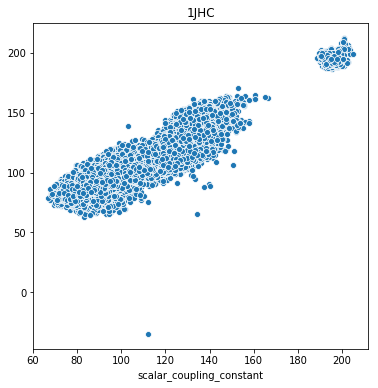

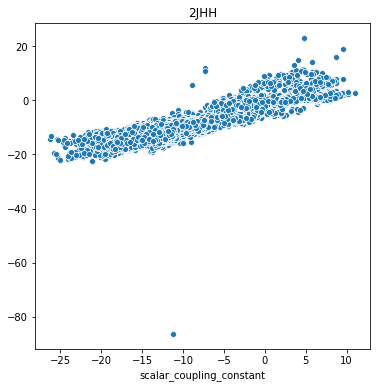

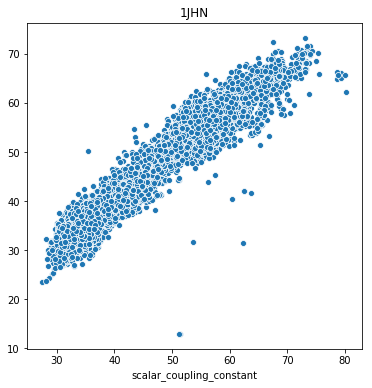

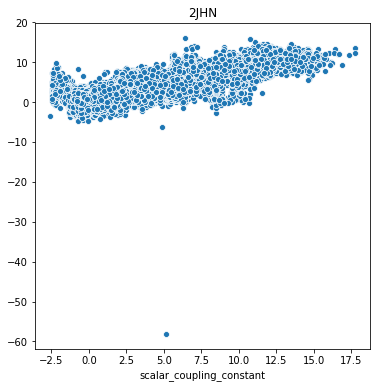

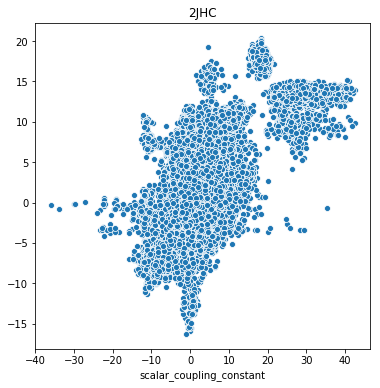

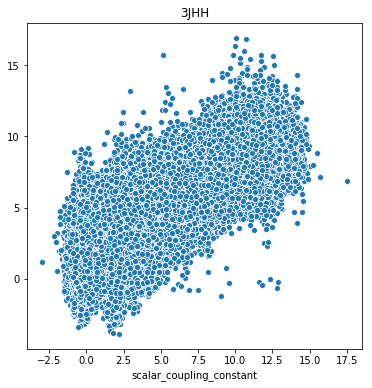

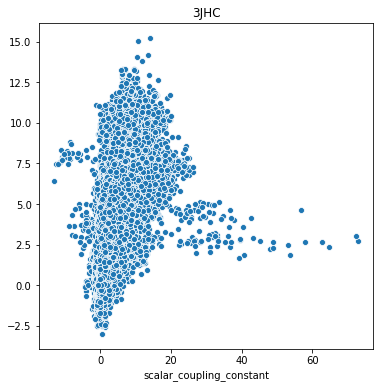

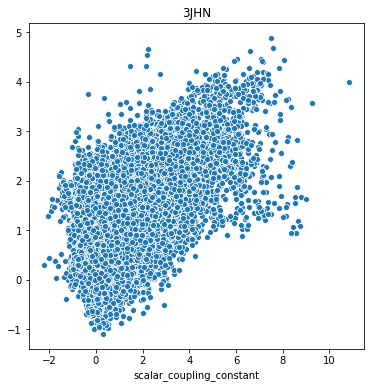

In [5]:
# First train a regressor on 75% of the data and use the rest for validation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

mae_dict = {}; train_mae_dict = {}; mean_dict = {}; regr_dict = {};
mae_total = 0;

types = train.type.unique()
# plt.figure(); [fig, axs] = plt.subplots(2,4,figsize=(12, 10));
for mol_type in types:
    print('Now training type: '+str(mol_type))
    
    # Prepare data for the model
    train_by_type = train_features[train_features['type']==mol_type]
    train_by_type.pop('type')
    # train_by_type.drop(columns=['mu','spin','path_count']) # Remove some additional features for now
    target_by_type = train[train['type']==mol_type].scalar_coupling_constant
    
    train_X, val_X, train_Y, val_Y = train_test_split(train_by_type, target_by_type,test_size=0.25,random_state=42)
    
    mae_dict[mol_type] = []; train_mae_dict[mol_type] = []; mean_dict[mol_type] = []; regr_dict[mol_type] = [];
    
    # Make model
    regr_model = LinearRegression(copy_X=True, n_jobs=-1)
    fit = regr_model.fit(train_X, train_Y)
    
    # Predict
    pred_Y = regr_model.predict(val_X)
    
    # Calculate MSE
    mae = mean_absolute_error(val_Y, pred_Y) # MSE for validation data
    train_mae = mean_absolute_error(train_Y, regr_model.predict(train_X)) # MSE for the training data
    mean = sum(val_Y)/len(val_Y) # Mean of the validation data
    print('val mae: '+str(mae)+'train mae: '+str(train_mae)+'mean: '+str(mean))
    
    # Save all MSEs
    mae_dict[mol_type].append(mae)
    train_mae_dict[mol_type].append(train_mae)
    mean_dict[mol_type].append(mean)
    regr_dict[mol_type].append(fit)

    # Calculate total MSE
    min_mae = min(mae_dict[mol_type])
    # num_val = len(val_Y.index)
    mae_total += np.log(min_mae)
    print('mae_total: '+str(mae_total))
    
    # axs[j//4, ((j+1)%4)-1].plot(val_Y, pred_Y, 'o')
    # axs[j//4, ((j+1)%4)-1].set_title(mol_type)
    # g = sns.FacetGrid(pd.DataFrame({'type':mol_type,'scalar_coupling_constant': val_Y,'predictions':pred_Y}), 
    #                      col="type", col_order = types,sharex=False,sharey=False)
    # g.map(sns.scatterplot, "scalar_coupling_constant","predictions")
    
    plt.figure(figsize=[6,6])
    sns.scatterplot(x=val_Y, y=pred_Y)
    plt.title(mol_type)

mae_total = mae_total/8
print('Log MAE using a different linear regressor for each type: '+str(mae_total))
# plt.show()
